# Final Assignment Python Data
Liquor Sales Analysis

## Report

### Abstract

  The main purpose of this assignment is to present the analysis and visualization of large datasets using a collection of python libraries. The dataset we were asked to work with consists of Liquor sales in Iowa, USA covering the years 2012-2020. The project consisted of three tasks. The first is to filter the data for a specific time period, the second is to distinguish the most popular product in each zip code, and finally to calculate the percentage of sales per store in dollars. Also for each task we have to visualize the calculated result with our preferred presentation tool. For my implementation I chose to compose my solution inside a jupyter notebook, for better organization and overall view of the assignment.

### Introduction

Before starting the calculation process, the data must be loaded and cleaned. For my implementation, i chose to load the data directly from the link within the code, without going through the download process. To clean the data I simply removed all rows that have blank values.

### Solving the task 1

  The first task can be easily solved using a single line of code. All we have to do is to filter all the data where the year in the "date" column is greater than and equal to 2016 and less than and equal to 2019, the above comparison is done by logical conjugation.

 ### Solving the task 2
  Task 2 is actually the first part of this task, everything i have mentioned so far belongs to the preprocessing step, but for convenience i have chosen to split the assignment into multiple subtasks. The current task asks us to distinguish the most popular object in each postal code. All we have to do is group the data by zip code as well as add it. The completion of this task is to display the calculated results in a scatter plot with our visualization library of choice. I decided to use two viewing methods, one way directly from the pandas library and the second way with the seaborn library.

### Solving the task 3

Task 3 is a continuation of the previous task and is the second and final task of this assignment. The calculation of the sales percentage per store consists of two parts. The first part is the calculation of total sales and the second part is the calculation of sales per store. The first part can be easily solved by summing all the values from the "sales_dollar" column. The second part needs to group each store and add up their sales. Then we need to multiply each store's sales by 100 because we want the final result to be a percentage and then divide it by the total sales. Finally, the visualization of the results of the above calculation is the end of this task and this assignment. Again I chose the same two ways of visualization as the previous assignment.

### Conclusion

The assignment was a good practice in data analysis and visualization using python and its helper libraries. There were no particular difficulties and the solutions can be easily implemented with a few lines of code. The theoretical notes provided by the course and the exercises we were asked to solve during the first phases of the course were of great help.


# Import libraries

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [177]:
df = pd.read_csv('https://storage.googleapis.com/courses_data/Assignment%20CSV/finance_liquor_sales.csv')

# Clean data

In [178]:
df.dropna(inplace=True)

# Preview data

In [179]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-31797900035,2020-11-10,4967,Jeff's Market / Blue Grass,"102, W Mayne St",Blue Grass,52726.0,POINT (-90.766126 41.509119),82.0,SCOTT,...,26858,Templeton 4YR Rye,12,375,9.99,14.99,1,14.99,0.37,0.09
1,INV-23548800092,2019-11-27,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51.0,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
3,INV-39482900037,2021-08-24,3719,Wal-Mart 0581 / Marshalltown,2802 S Center St,Marshalltown,50158.0,POINT (-92.91231 42.012918),64.0,MARSHALL,...,65259,Jagermeister Liqueur Mini Meisters,12,20,4.93,7.40,12,88.80,0.24,0.06
4,INV-39520400088,2021-08-25,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201.0,POINT (-95.854899 43.184242),71.0,OBRIEN,...,77487,Tortilla Gold DSS,12,1000,4.85,7.28,4,29.12,4.00,1.05
5,INV-29941700050,2020-09-02,3842,Bancroft Liquor Store,107 N Portland St Po Bx 222,Bancroft,50517.0,POINT (-94.218 43.29355),55.0,KOSSUTH,...,77055,Sir Winston Peach,6,750,13.01,19.52,18,351.36,13.50,3.56


# Filter data for the timeframe 2016-2019

In [180]:
df['date'] = pd.to_datetime(df['date'])
filtered = df[(df['date'].dt.year >= 2016) & (df['date'].dt.year <= 2019)]
filtered = filtered.reset_index()

In [181]:
print(max(filtered['date']))
print(min(filtered['date']))

2019-12-23 00:00:00
2016-01-15 00:00:00


# Preview filtered data

In [182]:
filtered.head()

,index,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,1,INV-23548800092,2019-11-27,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51.0,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.0,1.58
1,6,S30390600011,2016-01-26,2641,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.855054 41.261673),78.0,...,81124,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,1.2,0.32
2,7,S30348700047,2016-01-25,3162,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761.0,POINT (-91.06411300000002 41.408437),70.0,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.0,1.06
3,8,S30466200002,2016-02-01,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77.0,...,973627,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,120.0,31.70
4,9,INV-16481100198,2018-12-20,2544,Hy-Vee Food Store / Marshalltown,802 South Center,Marshalltown,50158.0,POINT (-92.912817 42.039205),64.0,...,67557,Kamora Coffee Liqueur,12,1000,8.39,12.59,6,75.54,6.0,1.58


# Task 1
Discern the most popular item in each zipcode.

In [183]:
task1 = filtered.groupby(['zip_code','item_number'])['bottles_sold'].sum().reset_index()

In [184]:
task1.head()

,zip_code,item_number,bottles_sold
0,50010.0,946574,288
1,50022.0,86507,4
2,50131.0,38089,48
3,50158.0,67528,3
4,50158.0,67557,6


# Task 1 Plot - Matplotlib (Through pandas)

<Axes: xlabel='zip_code', ylabel='bottles_sold'>

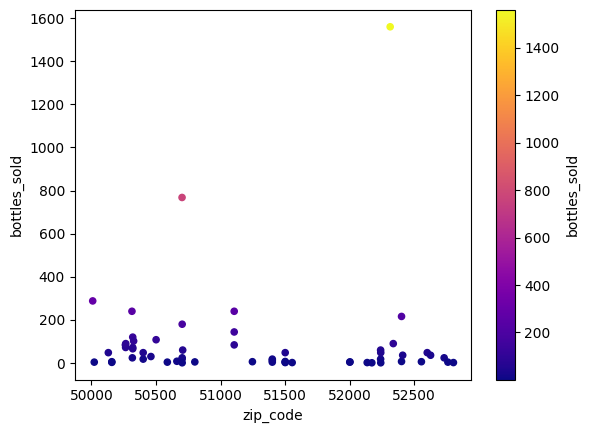

In [185]:
task1.plot.scatter(x='zip_code',y='bottles_sold',c='bottles_sold',colormap='plasma')

# Task 1 Plot - Seaborn

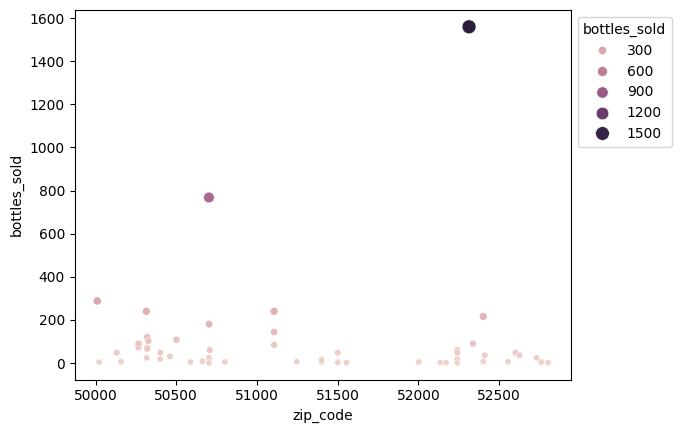

In [186]:
task1_plot = sns.scatterplot(
 data=task1, 
 x="zip_code",
 y="bottles_sold",hue="bottles_sold", size="bottles_sold", sizes=(20, 100)
)
sns.move_legend(task1_plot, "upper left", bbox_to_anchor=(1, 1))

# Task 2
Compute the sales percentage per store (in dollars).

In [187]:
task2 =  (filtered.groupby("store_name")["sale_dollars"].sum() *100 / filtered['sale_dollars'].sum()).sort_values()
task2 = task2.round(2)

In [188]:
task2  =task2.sort_values(ascending=True)
task2 = task2.tail(15).reset_index()

# Task 2 Plot - Matplotlib (Through pandas)

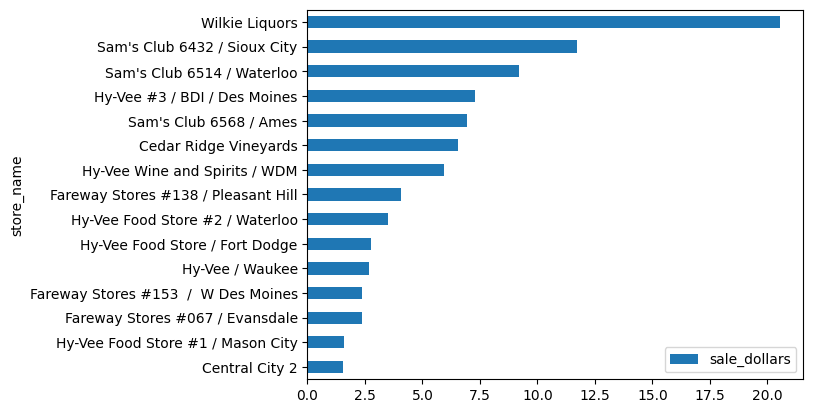

In [189]:
task2_plt = task2.plot.barh(x='store_name', y='sale_dollars', rot=0)

# Task 2 Plot - Seaborn

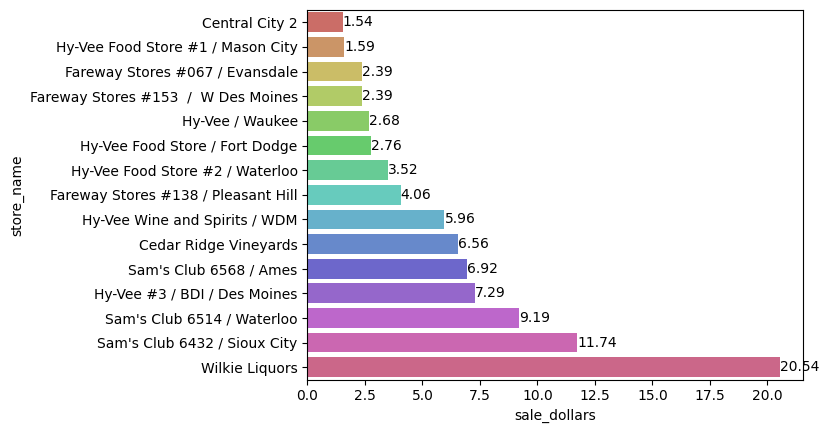

In [190]:
task2_plot = sns.barplot(y='store_name', x='sale_dollars', hue="store_name",data=task2, palette="hls")
for value in task2_plot.containers: 
    task2_plot.bar_label(value)